# PARTE II - Desafio Modelo Preditivo
Agora que temos um dataset completo sem dados nulos, vamos arregaçar as mangas e fazer uma análise exploratória desses dados embusca de insghts valiosos.

In [1]:
# Import das bibliotecas que serão utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_explor = pd.read_csv('dataset_sem_dados_faltantes.csv', sep=',')

In [3]:
display(df_explor)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,Juridico,Comércio,AOL,PEQUENO,13
77263,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,Juridico,Indústria,GMAIL,GRANDE,25
77264,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,Juridico,Serviços,HOTMAIL,GRANDE,67
77265,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,234489.0,115.0,2021-05-13,Juridico,Serviços,YAHOO,MEDIO,14


In [4]:
def descricão(df):
    resumo = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo': df.dtypes.values,
        'Quantidade de Dados Não Vazios': df.notna().sum().values,
        'Quantidade de Dados Vazios': df.isna().sum().values,
        'Porcentagem de Valor Vazios (%)': (df.isna().mean() * 100).round(2).values
    })

    styled = (resumo.style
        .set_properties(**{
            'background-color': "#0f010194", 
            'border-color': 'black',
            'text-align': 'center'
        })
        .background_gradient(subset=['Porcentagem de Valor Vazios (%)'], cmap='Reds')
        .bar(subset=['Quantidade de Dados Vazios'], color='lightblue')
        .set_table_styles([
            {
                'selector': 'th',
                'props': [
                    ('background-color', '#0d253f'),
                    ('color', 'white'),
                    ('text-align', 'center'),
                    ('font-size', '12px')
                ]
            }
        ])
    )
    return styled

In [5]:
descricão(df_explor)

/home/rafael/Downloads/datarisk-case-ds-junior-master/.venv/lib/python3.12/site-packages/pandas/io/formats/style.py:4040: RuntimeWarning: invalid value encountered in scalar divide
  end = (x - left) / (right - left)


,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Porcentagem de Valor Vazios (%)
0,ID_CLIENTE,int64,77267,0,0.000000
1,SAFRA_REF,object,77267,0,0.000000
2,DATA_EMISSAO_DOCUMENTO,object,77267,0,0.000000
3,DATA_PAGAMENTO,object,77267,0,0.000000
4,DATA_VENCIMENTO,object,77267,0,0.000000
5,VALOR_A_PAGAR,float64,77267,0,0.000000
6,TAXA,float64,77267,0,0.000000
7,RENDA_MES_ANTERIOR,float64,77267,0,0.000000
8,NO_FUNCIONARIOS,float64,77267,0,0.000000
9,DATA_CADASTRO,object,77267,0,0.000000


# 2 Analise Exploratória dos Dados

## 2.1 Empresa PJ ou PF

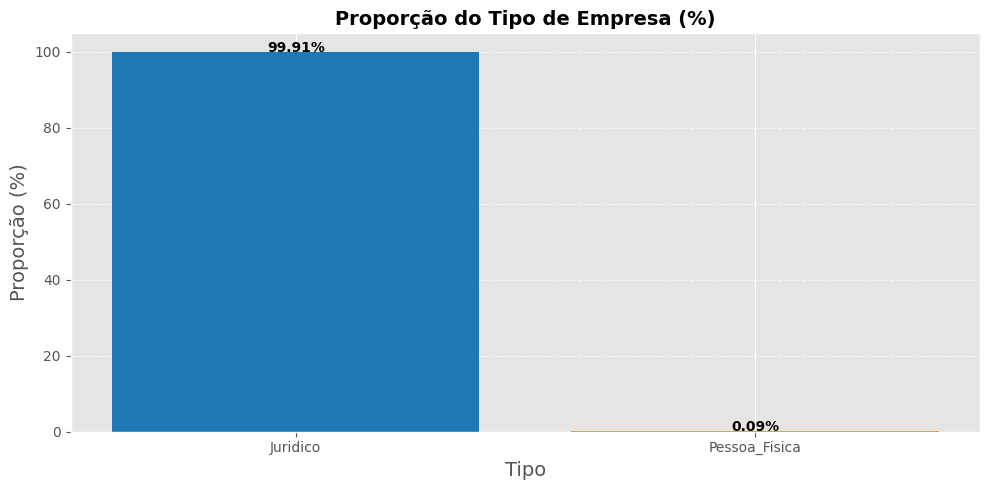

In [6]:
# Classificação do Tipo de Empresa (PJ ou PF)
contagem_tipo = df_explor['FLAG_PF'].value_counts(normalize=True)*100

# Gráfico
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.bar(contagem_tipo.index, contagem_tipo.values, color=['#1f77b4', '#ff7f0e'])

# Título e rótulos
plt.title('Proporção do Tipo de Empresa (%)', fontsize=14, fontweight='bold')
plt.xlabel('Tipo', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, valor in enumerate(contagem_tipo.values):
    plt.text(i, valor + 0.1, f'{valor:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.show()

Quase 100% dos dados é composto por empresa do tipo PJ (Pessoa Jurídica).

## 2.1 Tipo de Email Utilizado
É de extrema importância termos dados de contato dos clientes, pois assim, podemos manter uma relação de proximidade com o cliente, isso pode ser útil para oferecer serviços, cobrança, novas ofertas, etc. 

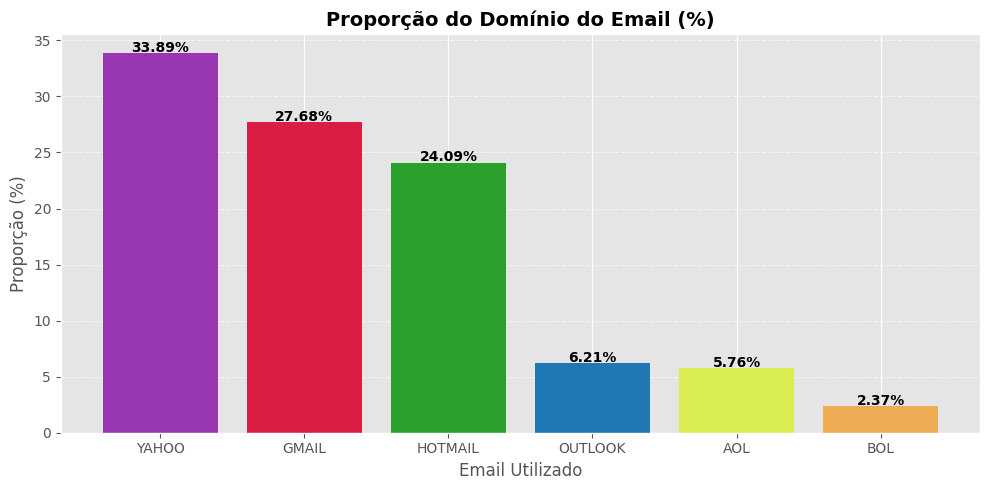

In [7]:
# Email utilizado
email_contagem = df_explor['DOMINIO_EMAIL'].value_counts(normalize=True)*100

# Gráfico
# Lista de cores — pode ser qualquer sequência
cores = ['#9937B3', '#DB1D43', '#2ca02c', '#1f77b4', '#DAED51', '#EDAC51']
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.bar(email_contagem.index, email_contagem.values, color=cores[:len(email_contagem)])

# Título e rótulos
plt.title('Proporção do Domínio do Email (%)', fontsize=14, fontweight='bold')
plt.xlabel('Email Utilizado', fontsize=12)
plt.ylabel('Proporção (%)', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, valor in enumerate(email_contagem.values):
    plt.text(i, valor + 0.1, f'{valor:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.show()

## 2.2 Analise do Tamanho da Empresa
O tamanho da empresa pode ser útil para ver a capacidade de produção que ela tem, se for grande, pode ter um elevado número de funcionários, gastos ou renda altos.

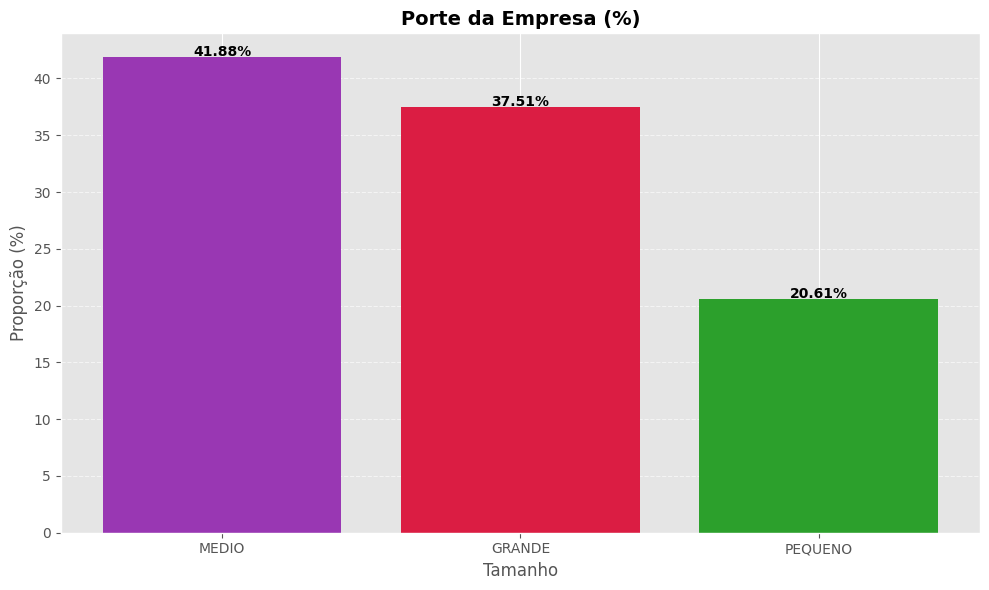

In [8]:
# Analisando o Porte das Empresas
porte_contagem = df_explor['PORTE'].value_counts(normalize=True)*100

# Gráfico
# Lista de cores — pode ser qualquer sequência
cores = ['#9937B3', '#DB1D43', '#2ca02c']
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.bar(porte_contagem.index, porte_contagem.values, color=cores[:len(email_contagem)])

# Título e rótulos
plt.title('Porte da Empresa (%)', fontsize=14, fontweight='bold')
plt.xlabel('Tamanho', fontsize=12)
plt.ylabel('Proporção (%)', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, valor in enumerate(porte_contagem.values):
    plt.text(i, valor + 0.1, f'{valor:.2f}%', ha='center', fontsize=10, fontweight='bold')

## 2.3 Relação entre Número de Funcionários e o Porte da Empresa
O porte da empresa e a quantidade de funcionários costumam estar diretamente relacionados — e isso é algo muito comum em análises de crédito, risco e mercado.

In [9]:
# Relação entre número de funcionarios e o tamanho da empresa
df_explor.groupby('PORTE')['NO_FUNCIONARIOS'].describe().style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
PORTE,,,,,,,,
GRANDE,28984.000000,120.491099,15.796407,70.000000,111.000000,121.000000,130.000000,198.000000
MEDIO,32358.000000,117.811453,17.181269,60.000000,107.000000,117.000000,129.000000,179.000000
PEQUENO,15925.000000,113.524333,18.400908,67.000000,100.000000,114.000000,124.000000,187.000000


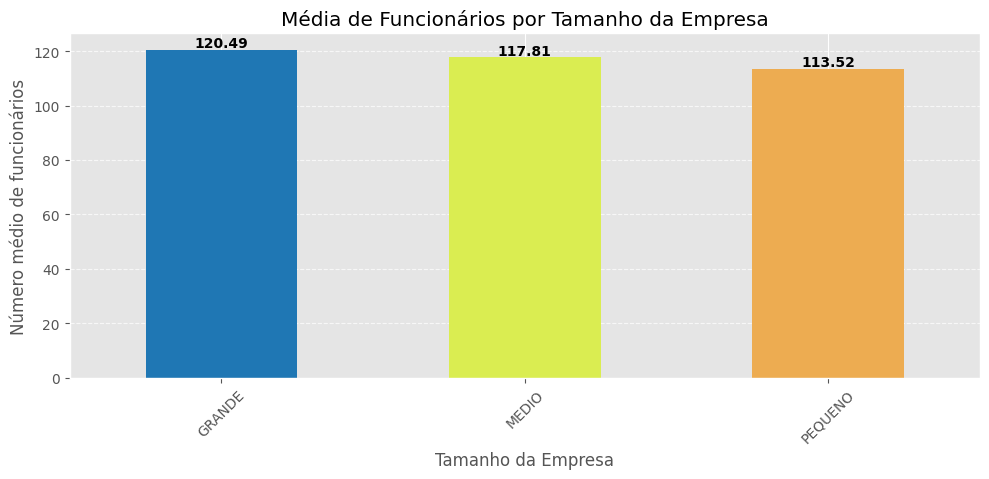

In [10]:
media_func = df_explor.groupby('PORTE')['NO_FUNCIONARIOS'].mean()

media_func.plot(kind='bar', color=['#1f77b4', '#DAED51', '#EDAC51'], figsize=(10,5))
plt.style.use('ggplot')
plt.title('Média de Funcionários por Tamanho da Empresa')
plt.ylabel('Número médio de funcionários')
plt.xlabel('Tamanho da Empresa')
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(media_func.values):
    plt.text(i, valor + 0.9, f'{valor:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.show()

/tmp/ipykernel_10066/850289798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PORTE', y='NO_FUNCIONARIOS', data=df_explor, palette='Set2')


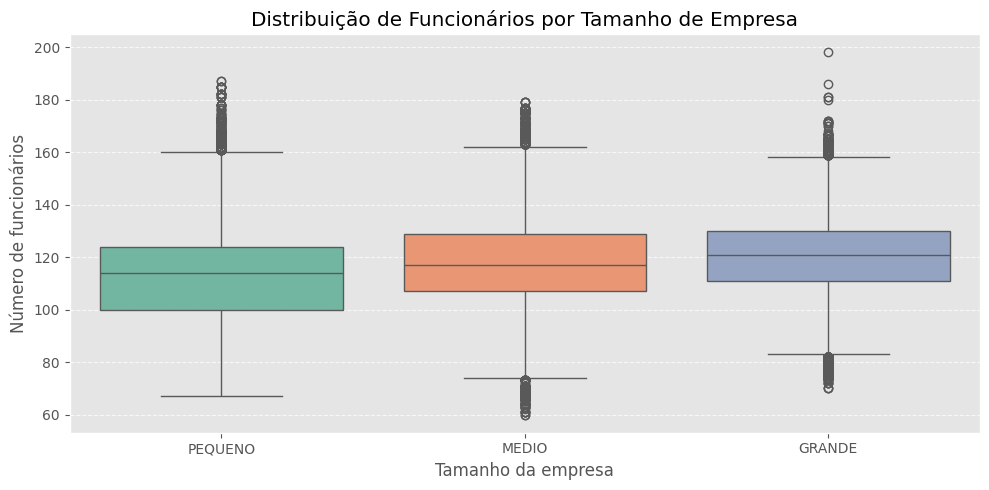

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='PORTE', y='NO_FUNCIONARIOS', data=df_explor, palette='Set2')
plt.title('Distribuição de Funcionários por Tamanho de Empresa')
plt.xlabel('Tamanho da empresa')
plt.ylabel('Número de funcionários')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

É importante termos essa relação, pois:
- É um indicador de capacidade operacional;
- Menos risco de inadimplência;
- Auxliar na segmentação de clientes

## 2.4 Analise do Segmento Industrial

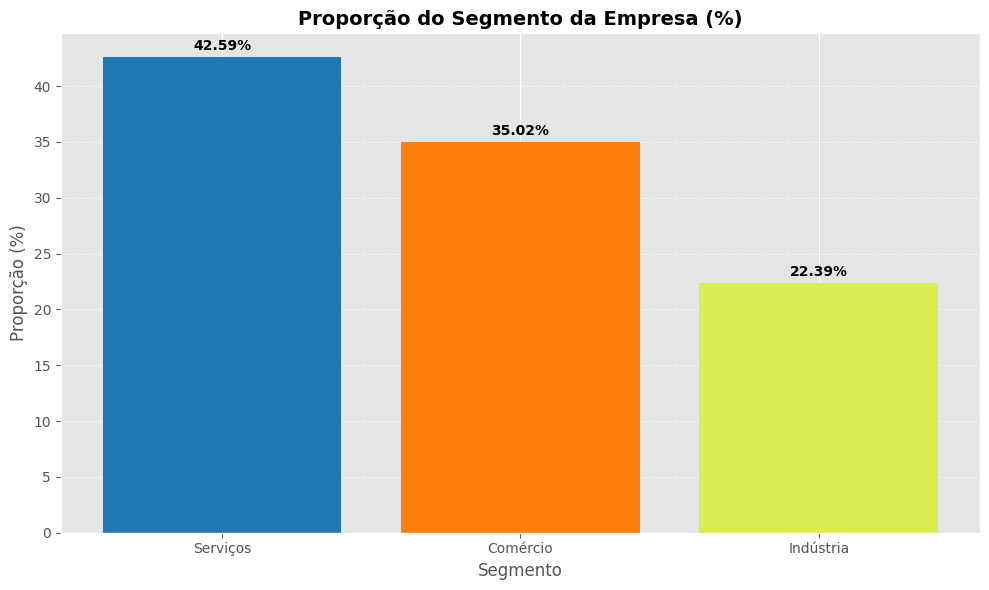

In [12]:
# Classificação do Segmento Industrial
contagem_segmento = df_explor['SEGMENTO_INDUSTRIAL'].value_counts(normalize=True)*100

# Gráfico
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.bar(contagem_segmento.index, contagem_segmento.values, color=['#1f77b4', '#ff7f0e', '#DAED51'])

# Título e rótulos
plt.title('Proporção do Segmento da Empresa (%)', fontsize=14, fontweight='bold')
plt.xlabel('Segmento', fontsize=12)
plt.ylabel('Proporção (%)', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, valor in enumerate(contagem_segmento.values):
    plt.text(i, valor + 0.6, f'{valor:.2f}%', ha='center', fontsize=10, fontweight='bold')


plt.show()

## 2.5 Correlação entre Porte da Empresa e Segmento em ela atua

In [3]:
porte_por_seg = df_explor.groupby('PORTE')['SEGMENTO_INDUSTRIAL'].value_counts(normalize=True)*100
print(porte_por_seg)

PORTE    SEGMENTO_INDUSTRIAL
GRANDE   Serviços               45.138697
         Comércio               37.199834
         Indústria              17.661468
MEDIO    Serviços               38.330552
         Comércio               34.362445
         Indústria              27.307003
PEQUENO  Serviços               46.605965
         Comércio               32.408163
         Indústria              20.985871
Name: proportion, dtype: float64


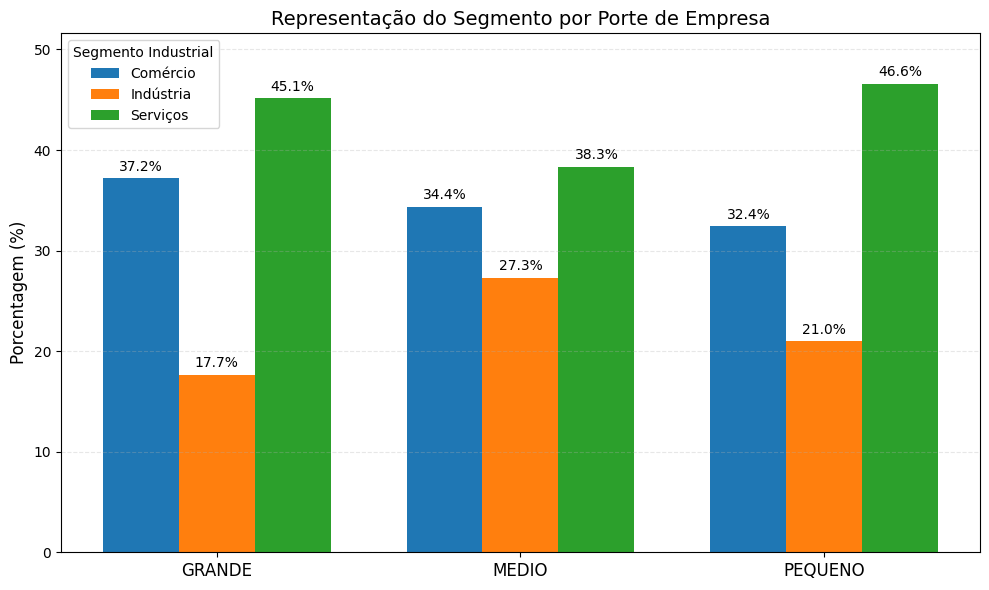

In [4]:
# df_plot: DataFrame com índice = portes (ex: ['GRANDE','MEDIO','PEQUENO'])
# e colunas = segmentos (ex: ['Serviço','Comércio','Indústria']) com valores em porcentagem.
# Ex.: df_plot = porte_por_seg.unstack()

df_plot = porte_por_seg.unstack()  # Converte MultiIndex para tabela

n_groups = len(df_plot.index)
n_seg = len(df_plot.columns)
x = np.arange(n_groups)

largura = 0.25  # largura de cada barra
# calculamos deslocamentos centrados: por ex. para 3 barras -> [-largura, 0, +largura]
offsets = (np.arange(n_seg) - (n_seg - 1) / 2 ) * largura

plt.figure(figsize=(10,6))

# Plot de cada segmento com deslocamento apropriado
for j, seg in enumerate(df_plot.columns):
    positions = x + offsets[j]
    plt.bar(positions, df_plot[seg].values, width=largura, label=seg)

# Ajustes de rótulos e título
plt.xticks(x, df_plot.index, fontsize=12)
plt.ylabel("Porcentagem (%)", fontsize=12)
plt.title("Representação do Segmento por Porte de Empresa", fontsize=14)

# Ajustar limite superior para que as labels caibam
ymax = df_plot.values.max()
plt.ylim(0, ymax + max(5, 0.08*ymax))  # margem de 5 unidades ou 8% do máximo

# Adicionar valores sobre as barras, centralizados na posição correta
for j, seg in enumerate(df_plot.columns):
    positions = x + offsets[j]
    for xi, valor in zip(positions, df_plot[seg].values):
        plt.text(xi, valor + (0.01*ymax), f"{valor:.1f}%", ha='center', va='bottom', fontsize=10)

plt.legend(title="Segmento Industrial")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



## 2.6 Onde estão localizadas essa empresas
Analisando os primeiros dois dígitos do CEP, podemos analisar a localizar das empresas.

In [24]:
df_explor['CEP_2_DIG'].value_counts().head(10).to_frame().style.background_gradient(cmap='Blues')

,count
CEP_2_DIG,
13,3884
35,2845
68,2603
89,2588
86,2135
37,2107
12,2076
78,2006
75,1773


De acordo com site dos correios, podemos obter informações sobre como o CEP funciona e o que os digitos pode nos dizer.
Cada número de CEP corrensponde a uma Região, Sub-região, Setor, Subsetor, Divisor de Subsetor e Identificadores de Distribuição.

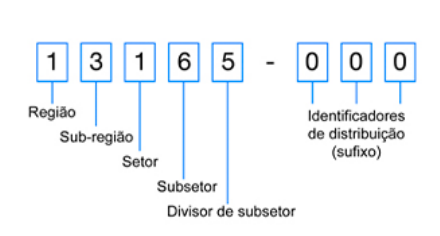

O Brasil foi divido em dez regiões postais, indo do **0 ao 9**, o que define o primeiro número do CEP. A distribuição foi feita no sentido anti-horário, a partir do estado de São Paulo.

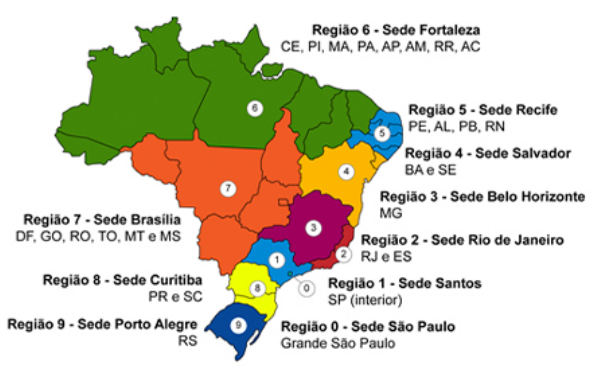

- **Região 0 :** grande São Paulo;
- **Região 1:** interior de São Paulo;
- **Região 2:** Rio de Janeiro e Espírito Santo;
- **Região 3:** Minas Gerais;
- **Região 4:** Bahia e Sergipe;
- **Região 5:** Pernambuco, Alagoas, Paraíba e Rio Grande do Norte;
- **Região 6:** Ceará, Piauí, Maranhão, Pará, Roraima, Amapá, Acre e Amazonas;
- **Região 7:** Distrito Federal, Goiás, Rondônia, Tocantins, Mato Grosso e Mato Grosso do Sul;
- **Região 8:** Paraná e Santa Catarina;
- **Região 9:** Rio Grande do Sul.

Com base nessa informação podemos ver que o top 10 localidades das empresas são:
- 1 - Interior de São Paulo;
- 2 - Minas Gerais;
- 3 - Ceará, Piauí, Maranhão, Pará, Roraima, Amapá, Acre e Amazonas;
- 4 e 5 - Paraná e Santa Catarina;
- 6 - Minas Gerais;
- 7 - Interior de São Paulo
- 8 e 9 - Distrito Federal, Goiás, Rondônia, Tocantins, Mato Grosso e Mato Grosso do Sul;
- 10 - Minas Gerais.

# 3 Preparando Dataset para Machine Learning
Nesta etapa vou iniciar os preparativos para o treinamento do modelo preditivo, irei deixar o dataset no formato ideal.

## Empresa PJ ou PF
Uma informação que temos é que esta coluna está classificada da seguinte maneira:Indica se o cliente é uma pessoa física (‘X’) ou jurídica (‘NaN’).

Vamos converter esssas informações nesse outro formato.
- 1 para Jurídica
- 0 para Pessoa Física

In [25]:
# Mapeamento do Tipo da Empresa
mapeamento_empresa = {
    'Juridico': 1,
    'Pessoa_Fisica': 0,
}

df_explor['FLAG_PF'] = df_explor['FLAG_PF'].map(mapeamento_empresa).astype('Int64')

## Analise das Colunas: Porte, Segmento Industrial e Dominio do Email
Agora iremos analisar as colunas a seguir e irei fazer uma transformação nos dados.
- **PORTE**: Indica o porte (tamanho) da empresa.
    - 1 para PEQUENO
    - 2 para MEDIO
    - 3 para GRANDE
- **SEGMENTO_INDUSTRIAL**: Indica a qual segmento da indústria pertence o
cliente. 
    - 1 para Serviço
    - 2 para Indústria
    - 3 para Comércio
- **DOMINIO_EMAIL**: Indica o domínio(ou provedor) do email utilizado para o
cadastro.
    - 1 YAHOO
    - 2 GMAIL
    - 3 HOTMAIL
    - 4 OUTLOOK
    - 5 AOL
    - 6 BOL

In [26]:
# Mapeamento do Porte da Empresa
mapeamento = {
    'PEQUENO': 1,
    'MEDIO': 2,
    'GRANDE': 3,
}

df_explor['PORTE'] = df_explor['PORTE'].map(mapeamento).astype("Int64")

# Mapeamento do Segmento da Empresa
mapeamento_seg = {
    'Serviços': 1,
    'Indústria': 2,
    'Comércio': 3,
}

df_explor['SEGMENTO_INDUSTRIAL'] = df_explor['SEGMENTO_INDUSTRIAL'].map(mapeamento_seg).astype("Int64")

# Mapeamento do Email Utilizado
mapeamento_email = {
    'YAHOO': 1,
    'GMAIL': 2,
    'HOTMAIL': 3,
    'OUTLOOK': 4,
    'AOL': 5,
    'BOL': 6,
}

df_explor['DOMINIO_EMAIL'] = df_explor['DOMINIO_EMAIL'].map(mapeamento_email).astype("Int64")

display(df_explor)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,217640.0,115.0,2013-08-22,1,1,1,1,65
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,217640.0,115.0,2013-08-22,1,1,1,1,65
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,217640.0,115.0,2013-08-22,1,1,1,1,65
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,217640.0,115.0,2013-08-22,1,1,1,1,65
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,217640.0,115.0,2013-08-22,1,1,1,1,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,1,3,5,1,13
77263,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,1,2,2,3,25
77264,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,1,1,3,3,67
77265,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,234489.0,115.0,2021-05-13,1,1,1,2,14


## Análise das Datas
Nesta seção irei formatar as datas, já o ML não lida bem com este tipo de dado.

In [27]:
# Transformar colunas object para datetime
cols = ['DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO']
df_explor[cols] = df_explor[cols].apply(pd.to_datetime)

# Calculo da diferença em dias da data de pagamento e vencimento
df_explor['DIF_DATA'] = (df_explor['DATA_PAGAMENTO'] - df_explor['DATA_VENCIMENTO']).dt.days

In [28]:
df_explor['INADIMPLENCIA'] = np.where(df_explor['DIF_DATA'] >= 5, 1, 0)
display(df_explor)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DIF_DATA,INADIMPLENCIA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,217640.0,115.0,2013-08-22,1,1,1,1,65,0,0
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,217640.0,115.0,2013-08-22,1,1,1,1,65,1,0
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,217640.0,115.0,2013-08-22,1,1,1,1,65,1,0
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,217640.0,115.0,2013-08-22,1,1,1,1,65,6,1
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,217640.0,115.0,2013-08-22,1,1,1,1,65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,1,3,5,1,13,0,0
77263,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,1,2,2,3,25,0,0
77264,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,1,1,3,3,67,0,0
77265,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,234489.0,115.0,2021-05-13,1,1,1,2,14,0,0


Separa os dados das colunas: **EMISSAO_DOCUMENTO, DATA_VENCIMENTO**

In [29]:
# Coluna Emissão Documentos
df_explor["Mes_Emissao_Documento"] = df_explor["DATA_EMISSAO_DOCUMENTO"].dt.month
df_explor["Dia_Emissao_Documento"] = df_explor["DATA_EMISSAO_DOCUMENTO"].dt.day

# Coluna Mês Vencimento 
df_explor["Mes_Vencimento"] = df_explor["DATA_VENCIMENTO"].dt.month
df_explor["Dia_Vencimento"] = df_explor["DATA_VENCIMENTO"].dt.day

display(df_explor)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,...,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,DIF_DATA,INADIMPLENCIA,Mes_Emissao_Documento,Dia_Emissao_Documento,Mes_Vencimento,Dia_Vencimento
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,217640.0,115.0,2013-08-22,...,1,1,1,65,0,0,8,17,9,6
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,217640.0,115.0,2013-08-22,...,1,1,1,65,1,0,8,19,9,10
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,217640.0,115.0,2013-08-22,...,1,1,1,65,1,0,8,26,9,17
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,217640.0,115.0,2013-08-22,...,1,1,1,65,6,1,8,30,10,5
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,217640.0,115.0,2013-08-22,...,1,1,1,65,0,0,8,31,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,...,3,5,1,13,0,0,6,30,7,16
77263,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,...,2,2,3,25,0,0,6,30,8,16
77264,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,...,1,3,3,67,0,0,6,30,7,16
77265,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,234489.0,115.0,2021-05-13,...,1,1,2,14,0,0,6,30,7,16


In [30]:
# Elimina as colunas que não serão utilizadas
df_explor = df_explor.drop(['ID_CLIENTE', 'SAFRA_REF', 'DATA_EMISSAO_DOCUMENTO', 'DATA_CADASTRO', 'DIF_DATA', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO', 'CEP_2_DIG'], axis=1)

In [31]:
display(df_explor)

,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,INADIMPLENCIA,Mes_Emissao_Documento,Dia_Emissao_Documento,Mes_Vencimento,Dia_Vencimento
0,35516.41,6.99,217640.0,115.0,1,1,1,1,0,8,17,9,6
1,17758.21,6.99,217640.0,115.0,1,1,1,1,0,8,19,9,10
2,17431.96,6.99,217640.0,115.0,1,1,1,1,0,8,26,9,17
3,1341.00,6.99,217640.0,115.0,1,1,1,1,1,8,30,10,5
4,21309.85,6.99,217640.0,115.0,1,1,1,1,0,8,31,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,89980.00,5.99,280343.0,161.0,1,3,5,1,0,6,30,7,16
77263,42239.00,5.99,235315.0,87.0,1,2,2,3,0,6,30,8,16
77264,20921.50,5.99,100006.0,122.0,1,1,3,3,0,6,30,7,16
77265,90231.05,6.99,234489.0,115.0,1,1,1,2,0,6,30,7,16


In [32]:
df_explor.to_csv('dataset_limpo.csv', index=False)